In [2]:
import sklearn
import xgboost
import pandas as pd
from xgboost import XGBRegressor

import shap
import numpy as np

In [3]:
X, y = shap.datasets.california()

# 找出非数值型列
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns.tolist()

# 如果有非数值型列，进行独热编码
if non_numeric_columns:
    X = pd.get_dummies(X, columns=non_numeric_columns)

# 再次训练模型
model = xgboost.XGBRegressor().fit(X, y)

# 使用转换后的数据创建解释器并计算SHAP值
explainer = shap.Explainer(model)
shap_values = explainer(X)

In [10]:
type(X)

pandas.core.frame.DataFrame

In [12]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
shap_values

.values =
array([[ 1.7081785 ,  0.09363674,  0.19277047, ...,  0.01571906,
        -0.39385185,  0.55515116],
       [ 1.426717  ,  0.03108795,  0.00601703, ...,  0.2112088 ,
        -0.36280793,  0.5884698 ],
       [ 1.3600677 ,  0.16082455,  0.47361216, ..., -0.02257477,
        -0.5582292 ,  0.5463798 ],
       ...,
       [-0.5842778 ,  0.01744973, -0.0949486 , ...,  0.10111337,
        -0.9798146 ,  0.3479332 ],
       [-0.6035651 ,  0.03118367, -0.05752674, ...,  0.23118298,
        -1.051862  ,  0.32962263],
       [-0.44976887,  0.02051439, -0.12479055, ..., -0.00343278,
        -0.85543966,  0.33553985]], dtype=float32)

.base_values =
array([2.0684865, 2.0684865, 2.0684865, ..., 2.0684865, 2.0684865,
       2.0684865], dtype=float32)

.data =
array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7

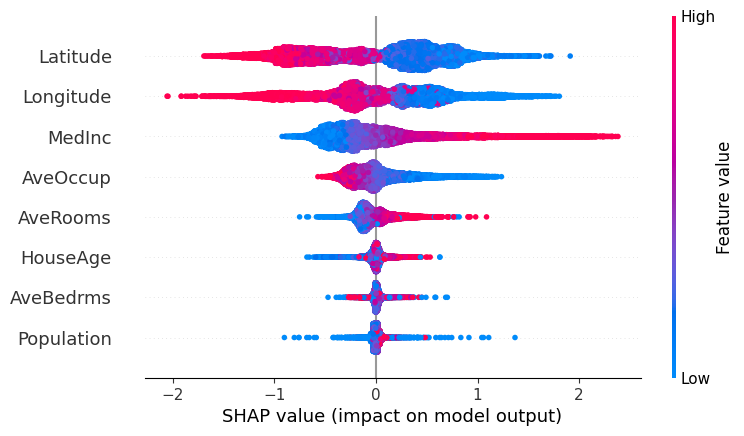

In [7]:
shap.plots.beeswarm(shap_values)

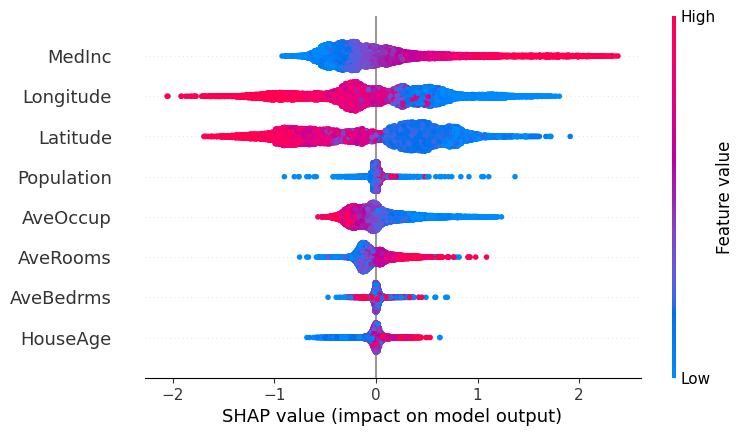

In [9]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))
